In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# Load the dataset from sklearn
data = datasets.load_breast_cancer()
X = data.data  # Features
y = data.target  # Labels (0: benign, 1: malignant)

In [ ]:
print("Dimensions of X (features):", X.shape)  # number of samples, number of features
print("Dimensions of y (labels):", y.shape)

Dimensions of X (features): (569, 30)
Dimensions of y (labels): (569,)


We standardize the features in X using StandardScaler from sci-kit learn, which scales the data to have a mean of 0 and a standard deviation of 1. \\

Standardization helps machine learning models perform better by ensuring that input features have a similar scale, which can improve model convergence and accuracy

In [ ]:
# Preprocessing the data
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split into training and testing sets
# test_size = 0.3 - 30% of the data will be used for testing
# random_state=42 - get the same split of the data each time you run the code to make results reproducible
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
# Logistic Regression
# Create a logistic regression model with a maximum of 1000 iterations to allow the model enough steps to converge if needed.
log_reg_model = LogisticRegression(max_iter=1000)
#Train the logistic regression model on the training data X_train and y_train
log_reg_model.fit(X_train, y_train)
# Predict the labels for the test data (X_test)
log_reg_pred = log_reg_model.predict(X_test)
# Calculates and stores the accuracy by comparing the predicted labels (log_reg_pred) to the actual labels (y_test)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)

In [ ]:
print(f"Accuracy of Logistic Regression: {log_reg_accuracy*100:.2f}%")

Accuracy of Logistic Regression: 98.25%


In [ ]:
precision = precision_score(y_test, log_reg_pred) * 100
recall = recall_score(y_test, log_reg_pred) * 100

print("Precision: {:.2f}%".format(precision))
print("Recall: {:.2f}%".format(recall))

Precision: 99.07%
Recall: 98.15%


The confusion matrix shows how many true positives (correctly predicted malignant tumors), true negatives (correctly predicted benign tumors), false positives (benign tumors incorrectly classified as malignant), and false negatives (malignant tumors incorrectly classified as benign) the model made.

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, log_reg_pred)
cm_df = pd.DataFrame(cm,
                     index=["Actual Benign (0)", "Actual Malignant (1)"],
                     columns=["Predicted Benign (0)", "Predicted Malignant (1)"])

# Display the confusion matrix as a table
print("Confusion Matrix:\n")
print(cm_df)

Confusion Matrix:

                      Predicted Benign (0)  Predicted Malignant (1)
Actual Benign (0)                       62                        1
Actual Malignant (1)                     2                      106


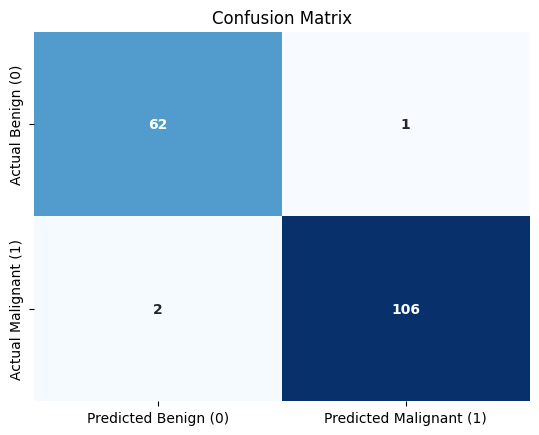

In [ ]:
# you can also display it using a heatmap for better visualization (requires seaborn)
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Benign (0)", "Predicted Malignant (1)"],
            yticklabels=["Actual Benign (0)", "Actual Malignant (1)"],
            annot_kws={"fontweight": "bold"})

plt.title("Confusion Matrix")
plt.show()

0.9980893592004703


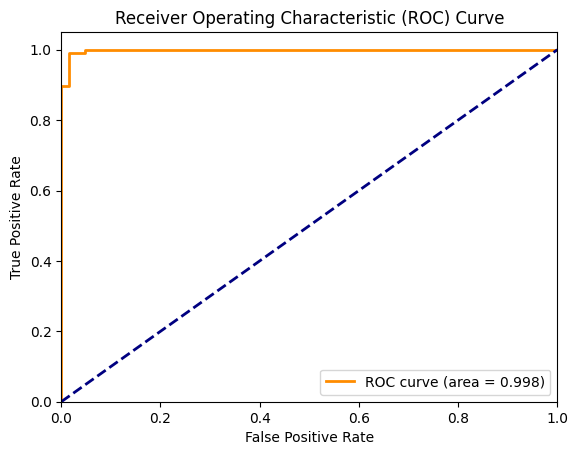

In [ ]:
# ROC Curve

# calculate the false positive rate (FPR) and true positive rate (TPR)
# for different classification thresholds, which are used to plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, log_reg_model.predict_proba(X_test)[:, 1])

# compute the Area Under the Curve (AUC) for the ROC curve
roc_auc = auc(fpr, tpr)
print(roc_auc)
plt.figure()

# plots the ROC curve using the false positive rate (fpr) on the x-axis and the true positive rate (tpr) on the y-axis
# area under the curve is displayed in the legend
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
# plot the diagonal line representing a random classifier (with AUC = 0.5)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()